In [ ]:
# import the needed libraries

from google.colab import drive

import os
from PIL import Image
import glob

import numpy as np
import pandas as pd

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# connect to drive in order to load the data
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/SMHDD/data'

Mounted at /content/drive


In [ ]:
# load the data
X_train = np.array(pd.read_csv(drive_path+'/Train.csv'))
y_train = np.array(pd.read_csv(drive_path+'/y_train.csv'))
X_test = np.array(pd.read_csv(drive_path+'/Test.csv'))
y_test = np.array(pd.read_csv(drive_path+'/y_test.csv'))

In [ ]:
# convert y_train and y_test from column vectors to row vectors
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [ ]:
print(X_train.shape, '\n', y_train.shape, '\n', X_test.shape, '\n', y_test.shape)

(6420, 22500) 
 (6420,) 
 (1133, 22500) 
 (1133,)


# Decision Tree

In [ ]:
# implement a simple Decision Tree classifier
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)

# make prediction on Training and Test sets
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

print('Accuracy on train:\t', np.mean(y_train==y_train_pred))
print('Accuracy on test:\t', np.mean(y_test==y_test_pred))

Accuracy on train:	 1.0
Accuracy on test:	 0.7625772285966461


# Random Forest

In [ ]:
# implement a Random Forest classifier
forest_clf = RandomForestClassifier(n_estimators=1000)
forest_clf = forest_clf.fit(X_train, np.ravel(y_train))

# make prediction on Training and Test sets
y_train_pred = forest_clf.predict(X_train)
y_test_pred = forest_clf.predict(X_test)

print('Accuracy on train:\t', np.mean(y_train==y_train_pred))
print('Accuracy on test:\t', np.mean(y_test==y_test_pred))

Accuracy on train:	 1.0
Accuracy on test:	 0.8614298323036187


#CNN

In the following we implement two simple CNN architectures.

## Simple CNN

In [ ]:
network_model = tf.keras.Sequential([ tf.keras.layers.Input(shape=X_train.shape[1]),
                                     tf.keras.layers.Reshape((150, 150, 1)),
                                     
                                     tf.keras.layers.Conv2D(32, (3, 3), strides=(1,1), padding='same', activation=None),
                                     tf.keras.layers.BatchNormalization(axis=-1),
                                     tf.keras.layers.Activation('relu'),

                                     tf.keras.layers.MaxPool2D((2, 2), strides=(1, 1), padding='same'),

                                     tf.keras.layers.Conv2D(16, (3, 3), strides=(1,1), padding='same', activation=None),
                                     tf.keras.layers.BatchNormalization(axis=-1),
                                     tf.keras.layers.Activation('relu'),

                                     tf.keras.layers.MaxPool2D((2, 2), strides=(1, 1), padding='same'),                                     

                                     tf.keras.layers.Conv2D(8, (3, 3), strides=(1,1), padding='same', activation=None),
                                     tf.keras.layers.BatchNormalization(axis=-1),
                                     tf.keras.layers.Activation(None),

                                     tf.keras.layers.MaxPool2D((2, 2), strides=(1, 1), padding='same'),
                                                                          
                                     tf.keras.layers.Flatten(),                                                                       
                                     tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
# Early Stopping mechanism
Early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

# configure the model
network_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fit the model
network_model.fit(X_train, y_train, validation_split=0.15, batch_size = 10, epochs = 20)#, callbacks=Early_stopping)

Epoch 1/20
546/546 [==============================] - 21s 36ms/step - loss: 0.2700 - accuracy: 0.8847 - val_loss: 0.3731 - val_accuracy: 0.8546
Epoch 2/20
546/546 [==============================] - 22s 41ms/step - loss: 0.2491 - accuracy: 0.8968 - val_loss: 0.4466 - val_accuracy: 0.8401
Epoch 3/20
546/546 [==============================] - 19s 35ms/step - loss: 0.2435 - accuracy: 0.8963 - val_loss: 0.4981 - val_accuracy: 0.8027
Epoch 4/20
546/546 [==============================] - 19s 35ms/step - loss: 0.2421 - accuracy: 0.8992 - val_loss: 0.6811 - val_accuracy: 0.7477
Epoch 5/20
546/546 [==============================] - 20s 36ms/step - loss: 0.2327 - accuracy: 0.9047 - val_loss: 0.6433 - val_accuracy: 0.7715
Epoch 6/20
546/546 [==============================] - 23s 42ms/step - loss: 0.2373 - accuracy: 0.9032 - val_loss: 0.3606 - val_accuracy: 0.8702
Epoch 7/20
546/546 [==============================] - 17s 30ms/step - loss: 0.2166 - accuracy: 0.9108 - val_loss: 0.5692 - val_accuracy:

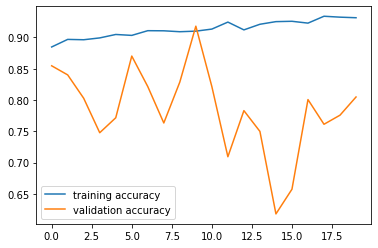

In [ ]:
plt.plot(network_model.history.history["accuracy"], label="training accuracy")
plt.plot(network_model.history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

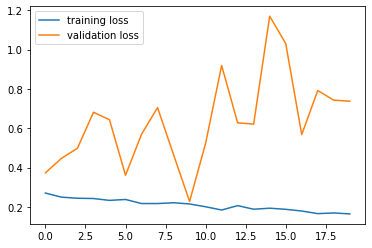

In [ ]:
plt.plot(network_model.history.history["loss"], label="training loss")
plt.plot(network_model.history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

In [ ]:
# make prediction on Training and Test sets
y_train_pred_probs = np.ravel(network_model.predict(X_train))
y_test_pred_probs = np.ravel(network_model.predict(X_test))

y_train_pred = np.zeros(y_train_pred_probs.shape)
y_train_pred[y_train_pred_probs>=0.5] = 1

y_test_pred = np.zeros(y_test_pred_probs.shape)
y_test_pred[y_test_pred_probs>=0.5] = 1

print('Accuracy on train:\t', np.mean(y_train==y_train_pred))
print('Accuracy on test:\t', np.mean(y_test==y_test_pred))

36/36 [==============================] - 1s 19ms/step
Accuracy on train:	 0.9146417445482866
Accuracy on test:	 0.8137687555163283


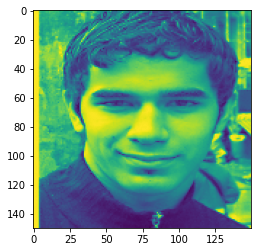

In [ ]:
misclassified = X_test[y_test!=y_test_pred][0]
plt.imshow(np.reshape(misclassified, (150, 150)).T)

## CNN with Skip Connections

In [ ]:
def resnet_model(input_shape):
    
    """    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in TensorFlow
    """
        
    input = tf.keras.Input(input_shape)    
    X_input = tf.keras.layers.Reshape((150, 150, 1))(input)    
    
    X = tf.keras.layers.Conv2D(16, (3, 3), strides=(1,1), padding='same', activation='relu')(X_input)
    X = tf.keras.layers.MaxPool2D((2, 2), strides=(1, 1), padding='same')(X)       
    X1 = X

    X = tf.keras.layers.Conv2D(16, (3, 3), strides=(1,1), padding='same', activation='relu')(X_input)
    X = tf.keras.layers.MaxPool2D((2, 2), strides=(1, 1), padding='same')(X)
    X = tf.keras.layers.Add()([X, X1])    
    X2 = X

    X = tf.keras.layers.Conv2D(16, (3, 3), strides=(1,1), padding='same', activation='relu')(X_input)
    X = tf.keras.layers.MaxPool2D((2, 2), strides=(1, 1), padding='same')(X)       
    X = tf.keras.layers.Add()([X, X1, X2])    

    # FLATTEN THE TENSOR 
    X = tf.keras.layers.Flatten()(X)        
    
    # DROPOUT LAYER (DISCARD PROBABILITY 0.4)
    X = tf.keras.layers.Dropout(0.4)(X)
    
    # FINAL LAYER WITH SIGMOID ACTIVATION
    X = tf.keras.layers.Dense(1, activation='sigmoid')(X)
                                    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = tf.keras.Model(inputs = input, outputs = X, name='resnet_model')        
    
    return model

In [ ]:
# create the network
network_model_2 = resnet_model(X_train.shape[1])

# configure the model
network_model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Early Stopping mechanism
Early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [ ]:
# fit the model
network_model_2.fit(X_train, y_train, validation_split=0.15, batch_size = 100, epochs = 20)#, callbacks=Early_stopping)

Epoch 1/20
55/55 [==============================] - 220s 4s/step - loss: 5.3446 - accuracy: 0.5683 - val_loss: 0.7927 - val_accuracy: 0.4829
Epoch 2/20
55/55 [==============================] - 211s 4s/step - loss: 0.5394 - accuracy: 0.7282 - val_loss: 1.0253 - val_accuracy: 0.3572
Epoch 3/20
55/55 [==============================] - 217s 4s/step - loss: 0.4697 - accuracy: 0.7632 - val_loss: 0.6080 - val_accuracy: 0.7290
Epoch 4/20
55/55 [==============================] - 214s 4s/step - loss: 0.3893 - accuracy: 0.8224 - val_loss: 1.1320 - val_accuracy: 0.4496
Epoch 5/20
55/55 [==============================] - 213s 4s/step - loss: 0.3589 - accuracy: 0.8430 - val_loss: 0.5411 - val_accuracy: 0.7622
Epoch 6/20
55/55 [==============================] - 214s 4s/step - loss: 0.2874 - accuracy: 0.8818 - val_loss: 0.9906 - val_accuracy: 0.5680
Epoch 7/20
55/55 [==============================] - 213s 4s/step - loss: 0.2668 - accuracy: 0.8846 - val_loss: 0.4840 - val_accuracy: 0.7965
Epoch 8/20
55

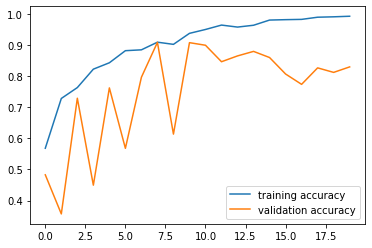

In [ ]:
plt.plot(network_model_2.history.history["accuracy"], label="training accuracy")
plt.plot(network_model_2.history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

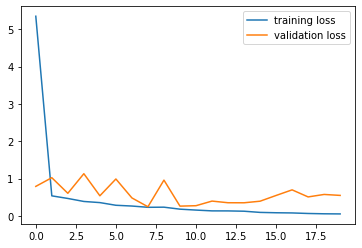

In [ ]:
plt.plot(network_model_2.history.history["loss"], label="training loss")
plt.plot(network_model_2.history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

In [ ]:
# make prediction on Training and Test sets
y_train_pred_probs = np.ravel(network_model_2.predict(X_train))
y_test_pred_probs = np.ravel(network_model_2.predict(X_test))

y_train_pred = np.zeros(y_train_pred_probs.shape)
y_train_pred[y_train_pred_probs>=0.5] = 1

y_test_pred = np.zeros(y_test_pred_probs.shape)
y_test_pred[y_test_pred_probs>=0.5] = 1

print('Accuracy on train:\t', np.mean(y_train==y_train_pred))
print('Accuracy on test:\t', np.mean(y_test==y_test_pred))

36/36 [==============================] - 12s 330ms/step
Accuracy on train:	 0.9691588785046729
Accuracy on test:	 0.8305383936451898


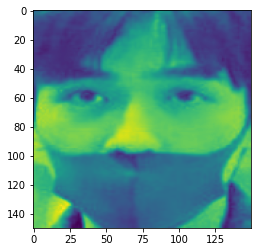

In [ ]:
misclassified = X_test[y_test!=y_test_pred][0]
plt.imshow(np.reshape(misclassified, (150, 150)).T)